In [96]:
import os 
import glob
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 
os.chdir('/mnt/BioHome/jreyna/jreyna/projects/dchallenge/')

outdir = 'results/main/coloc/sgls/'
os.makedirs(outdir, exist_ok=True)

pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

In [ ]:
sgl_fns = glob.glob('results/main/GRCh37/sgls/ldpairs/*/*/*/*/*/full_eqtl_ss/master.tsv') 

In [107]:
data = []
for fn in sgl_fns:
    
    split_info = fn.split('/')
    
    # get the current json string for the current file  
    gwas_source, eqtl_source, ge_source, loop_source = split_info[6:10] 
    
    df = pd.read_table(fn)
    df.loc[:, 'gwas_source'] = gwas_source
    df.loc[:, 'eqtl_source'] = eqtl_source
    df.loc[:, 'ge_source'] = ge_source
    df.loc[:, 'loop_source'] = loop_source
    
    #df = df.loc[(df['flt.has_fithichip_loop'] == 1) & (df['flt.is_eqtl_gene'] == 1)]
    
    df = df.loc[(df['flt.has_fithichip_loop'] == 1)]

    
    coloc_fn = 'results/main/GRCh37/coloc/{eqtl_db}/{gwas_source}/{eqtl_source}/{ge_source}/ldpairs/coloc_ld_snps.txt'
    eqtl_db = 'ImmuNexUT' if eqtl_source == 'ImmuNexUT' else 'eQTL_Catalogue'
    coloc_fn = coloc_fn.format(eqtl_db=eqtl_db, gwas_source=gwas_source, eqtl_source=eqtl_source, ge_source=ge_source)
    
    if len(df) > 0:  
        
        #coloc_lds = pd.read_table(coloc_fn)            
        data.append(df)
        

/tmp/ipykernel_118683/1931414875.py:9: DtypeWarning: Columns (53,54,55,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(fn)
/tmp/ipykernel_118683/1931414875.py:9: DtypeWarning: Columns (53,54,55,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(fn)


In [108]:
print('We included {} datasets.'.format(len(data)))

We included 102 datasets.


In [109]:
coloc_sgl_data = pd.concat(data)

In [110]:
coloc_sgl_data.head()

,chrA,startA,endA,chrB,startB,endB,name,score,strandA,strandB,sid,sgl.rsid,genename,geneid,eqtl_id,flt.is_eqtl_pair,flt.is_eqtl_gene,flt.is_closest_gene,flt.is_coloc_pair,flt.has_fithichip_loop,flt.has_snp_anchor,flt.has_gene_anchor,flt.is_coloc_sgl,flt.is_eqtl_sgl,coloc.chr,coloc.pos,coloc.sgl.rsid,coloc.pp_H0_Coloc_Summary,coloc.pp_H1_Coloc_Summary,coloc.pp_H2_Coloc_Summary,coloc.pp_H3_Coloc_Summary,coloc.pp_H4_Coloc_Summary,coloc.variant_id,coloc.dist,coloc.pvalue,coloc.FDR,coloc.slope_snp,coloc.ref,coloc.alt,coloc.AC,coloc.AF,coloc.AN,coloc.slope_se_snp,coloc.slope_gwas,coloc.slope_se_gwas,coloc.pval_nominal,coloc.old_pos,coloc.was_converted,coloc.rsID,coloc.main.chr,coloc.main.pos,coloc.rs_id,coloc.LD,coloc.id,loop.id,loop.chrA,loop.startA,loop.endA,loop.chrB,loop.startB,loop.endB,loop.score,loop.cc,loop.Coverage1,loop.isPeak1,loop.Bias1,loop.Mapp1,loop.GCContent1,loop.RESites1,loop.Coverage2,loop.isPeak2,loop.Bias2,loop.Mapp2,loop.GCContent2,loop.RESites2,loop.exp_cc_Bias,loop.p_Bias,loop.dbinom_Bias,loop.P-Value_Bias,loop.Q-Value_Bias,eqtl.chr,eqtl.pos,eqtl.beta,eqtl.pval,eqtl.fdr,eqtl.dist,eqtl.molecular_trait_id,eqtl.ref,eqtl.alt,eqtl.variant,eqtl.ma_samples,eqtl.maf,eqtl.se,eqtl.type,eqtl.ac,eqtl.an,eqtl.r2,eqtl.molecular_trait_object_id,eqtl.median_tpm,eqtl.rsid,eqtl.old_pos,eqtl.was_converted,gene.start,gene.end,gene.strand,gwas_source,eqtl_source,ge_source,loop_source
3974,chr18,67545497,67545498,chr18,67629038,67629039,18:67545498-ENSG00000150637,.,+,-,18:67545498,rs4094864,CD226,ENSG00000150637,18:67545498.ENSG00000150637,0,0,0,0,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18:67545498-ENSG00000150637,chr18.67550000.67555000.chr18.67560000.67565000,chr18,67550000.0,67555000.0,chr18,67560000.0,67565000.0,0.000006,25.0,255.0,1.0,0.152927,0.0,0.0,0.0,658.0,1.0,0.394612,0.0,0.0,0.0,6.612191,4.592176e-08,2.794796e-08,3.732713e-08,4.670665e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67498394,67629039,-,T1D_34012112_Gaulton,Schmiedel_2018,CD4_T-cell_anti-CD3-CD28,CD4_T-cell_naive
3975,chr18,67545497,67545498,chr18,67629038,67629039,18:67545498-ENSG00000150637,.,+,-,18:67545498,rs4094864,CD226,ENSG00000150637,18:67545498.ENSG00000150637,0,0,0,0,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18:67545498-ENSG00000150637,chr18.67550000.67555000.chr18.67565000.67570000,chr18,67550000.0,67555000.0,chr18,67565000.0,67570000.0,0.000006,14.0,255.0,1.0,0.152927,0.0,0.0,0.0,251.0,1.0,0.150528,0.0,0.0,0.0,2.865261,1.989928e-08,1.642567e-06,2.023757e-06,1.930268e-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67498394,67629039,-,T1D_34012112_Gaulton,Schmiedel_2018,CD4_T-cell_anti-CD3-CD28,CD4_T-cell_naive
3976,chr18,67545497,67545498,chr18,67629038,67629039,18:67545498-ENSG00000150637,.,+,-,18:67545498,rs4094864,CD226,ENSG00000150637,18:67545498.ENSG00000150637,0,0,0,0,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18:67545498-ENSG00000150637,chr18.67550000.67555000.chr18.67620000.67625000,chr18,67550000.0,67555000.0,chr18,67620000.0,67625000.0,0.000003,22.0,255.0,1.0,0.152927,0.0,0.0,0.0,968.0,1.0,0.580523,0.0,0.0,0.0,3.398721,2.360417e-08,1.452540e-11,1.702330e-11,3.198612e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67498394,67629039,-,T1D_34012112_Gaulton,Schmiedel_2018,CD4_T-cell_anti-CD3-CD28,CD4_T-cell_naive
3977,chr18,67545497,67545498,chr18,67629038,67629039,18:67545498-ENSG00000150637,.,+,-,18:67545498,rs4094864,CD226,ENSG00000150637,18:67545498.ENSG00000150637,0,0,0,0,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18:67545498-ENSG00000150637,chr18.67550000.67555000.chr18.6

## Finding Colocalization SGLs

In [111]:
genelist = coloc_sgl_data[['genename', 'geneid']].drop_duplicates(subset='genename')
genelist_str = '\n'.join(genelist.genename.values.tolist())

### Creating gene lists 

In [112]:
genelist

,genename,geneid
3974,CD226,ENSG00000150637
3978,RTTN,ENSG00000176225
3982,SOCS6,ENSG00000170677
3986,LINC01909,ENSG00000266258
3990,LIVAR,ENSG00000266304
3994,AC013558.1,ENSG00000264059
3998,LINC01910,ENSG00000266278
4002,LARP7P3,ENSG00000265698
4006,RPS2P6,ENSG00000214255
4010,AC091305.1,ENSG00000278971


In [52]:
print(genelist_str)

RBM17
PFKFB3
LINC02649
PRKCQ-AS1
DDX54
RITA1
TPCN1
PLBD2
SLC8B1
WDR4
NDUFV3
PKNOX1
U2AF1
LINC01679
MFNG
GGA1
SH3BP1
PDXP
LGALS1
NOL12
TRIOBP
GCAT
EIF3L
ANKRD54
AL022311.1
MICALL1
PICK1
AL022322.2
AP001625.2
PDE9A
AP001628.1
U2AF1L5
SLC37A1
LINC01671
ERVH48-1
CDC37L1-DT
CDC37L1
AK3
RCL1
KLF4P1
JAK2
IGHEP2
INSL6
TRAFD1
RPL7AP60
HECTD4
PTPN11
RPL6
OAS1
OAS3
OAS2
AC004551.1
DTX1
BRAP
ACAD10
ALDH2
MAPKAPK5
MAPKAPK5-AS1
ADAM1B
SLC25A3P2
AC004024.1
TMEM116
ERP29
AC073575.2
NAA25
RPL41
ESYT1
ZC3H10
AC034102.6
MYL6B
MYL6
SMARCC2
AC073896.4
RNF41
NABP2
ANKRD52
COQ10A
AC073896.5
AC073896.2
CS
AC073896.3
CNPY2
PAN2
IL23A
STAT2
TIMELESS
SPRYD4
GLS2
RBMS2
BAZ2A
SNORD59A
ATP5F1B
RN7SL809P
PTGES3
NACA
HSD17B6
PRIM1
RDH16
ZBTB39
HIST1H3A
HIST1H1C
HFE
HIST1H4C
HIST1H2BC
HIST1H2AC
HIST1H1E
HIST1H2BD
AL353759.1
HIST1H1PS1
HIST1H3D
HIST1H2AD
HIST1H4E
HIST1H2AE
HIST1H3E
HIST1H1D
HIST1H2BH
HIST1H3G
HIST1H4H
BTN3A2
BTN2A2
BTN3A1
HIST1H1A
CMAHP
TRIM38
U91328.1
SLC17A3
HIST1H2BE
PRKCQ
APOF
LINC02648
CD226
RTTN


#### Creating a short format dataframe

In [53]:
short_format = coloc_sgl_data[['sid', 'genename', 'geneid', 'gwas_source', 'eqtl_source', 'ge_source', 'loop_source']]
short_format.sort_values(['geneid', 'ge_source', 'loop_source'])

,sid,genename,geneid,gwas_source,eqtl_source,ge_source,loop_source
286,6:25414537,HFE,ENSG00000010704,T1D_32005708,ImmuNexUT,CL_Mono,monocyte_naive
287,6:25414537,HFE,ENSG00000010704,T1D_32005708,ImmuNexUT,CL_Mono,monocyte_naive
342,6:25414537,HFE,ENSG00000010704,T1D_32005708,ImmuNexUT,Fr_III_T,CD4_T-cell_naive
404,6:25414537,HFE,ENSG00000010704,T1D_32005708,ImmuNexUT,Fr_I_nTreg,CD4_T-cell_naive
156,6:25414537,HFE,ENSG00000010704,T1D_32005708,ImmuNexUT,Int_Mono,monocyte_naive
...,...,...,...,...,...,...,...
294,6:25414537,AL353759.1,ENSG00000283064,T1D_32005708,ImmuNexUT,Naive_CD4,CD4_T-cell_naive
356,6:25414537,AL353759.1,ENSG00000283064,T1D_32005708,ImmuNexUT,Tfh,CD4_T-cell_naive
356,6:25414537,AL353759.1,ENSG00000283064,T1D_32005708,ImmuNexUT,Th17,CD4_T-cell_naive
294,6:25414537,AL353759.1,ENSG00000283064,T1D_32005708,ImmuNexUT,Th2,CD4_T-cell_naive


#### Count the number of times we see a gene expression source

Text(0, 0.5, 'SGL Count')

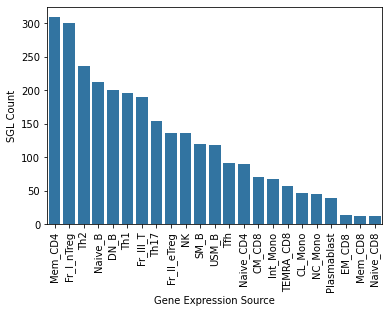

In [54]:
ge_counts = short_format.ge_source.value_counts().to_frame().reset_index()
ge_counts.columns = ['ge_source', 'sgl_count']

# make the plot
fig, ax = plt.subplots()
sns.barplot(x='ge_source', y='sgl_count', data=ge_counts, color=sns.color_palette(n_colors=1)[0])

# rotate ticks
for xtick in ax.get_xticklabels():
    xtick.set_rotation(90)
    
# set labels
ax.set_xlabel('Gene Expression Source')
ax.set_ylabel('SGL Count')

#### Count the number of times we see a loop source

Text(0, 0.5, 'SGL Count')

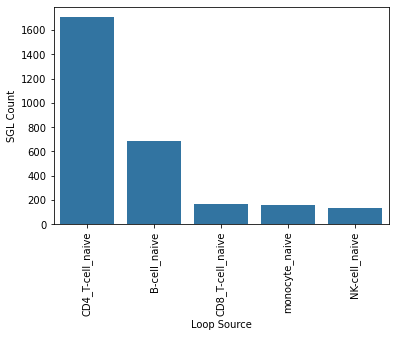

In [55]:
loop_counts = short_format.loop_source.value_counts().to_frame().reset_index()
loop_counts.columns = ['loop_source', 'sgl_count']

# make the plot
fig, ax = plt.subplots()
sns.barplot(x='loop_source', y='sgl_count', data=loop_counts, color=sns.color_palette(n_colors=1)[0])

# rotate ticks
for xtick in ax.get_xticklabels():
    xtick.set_rotation(90)
    
# set labels
ax.set_xlabel('Loop Source')
ax.set_ylabel('SGL Count')

# Looking at other situations

#### Checking out SNP-gene pairs with a loop

In [56]:
loop_data = all_data.loc[(all_data['flt.has_fithichip_loop'] == 1) & (all_data['flt.is_coloc_pair'] == 0)]

In [57]:
genelist = loop_data.genename.unique()
genelist = [x for x in genelist if not x.startswith('AP') and not x.startswith('AC') and not x.startswith('AL') and not x.startswith('MT')]

In [58]:
genelist_str = '\n'.join(genelist)

In [59]:
print(genelist_str)

RBM17
PFKFB3
LINC02649
PRKCQ-AS1
DDX54
RITA1
TPCN1
PLBD2
SLC8B1
WDR4
NDUFV3
PKNOX1
U2AF1
LINC01679
MFNG
GGA1
SH3BP1
PDXP
LGALS1
NOL12
TRIOBP
GCAT
EIF3L
ANKRD54
MICALL1
PICK1
PDE9A
U2AF1L5
SLC37A1
LINC01671
ERVH48-1
CDC37L1-DT
CDC37L1
AK3
RCL1
KLF4P1
JAK2
IGHEP2
INSL6
TRAFD1
RPL7AP60
HECTD4
PTPN11
RPL6
OAS1
OAS3
OAS2
DTX1
BRAP
MAPKAPK5
MAPKAPK5-AS1
ADAM1B
SLC25A3P2
TMEM116
ERP29
NAA25
RPL41
ESYT1
ZC3H10
MYL6B
MYL6
SMARCC2
RNF41
NABP2
ANKRD52
COQ10A
CS
CNPY2
PAN2
IL23A
STAT2
TIMELESS
SPRYD4
GLS2
RBMS2
BAZ2A
SNORD59A
ATP5F1B
RN7SL809P
PTGES3
NACA
HSD17B6
PRIM1
RDH16
ZBTB39
HIST1H3A
HIST1H1C
HFE
HIST1H4C
HIST1H2BC
HIST1H2AC
HIST1H1E
HIST1H2BD
HIST1H1PS1
HIST1H3D
HIST1H2AD
HIST1H4E
HIST1H2AE
HIST1H3E
HIST1H1D
HIST1H2BH
HIST1H3G
HIST1H4H
BTN3A2
BTN2A2
BTN3A1
HIST1H1A
CMAHP
TRIM38
U91328.1
SLC17A3
HIST1H2BE
PRKCQ
LINC02648
CD226
RTTN
SOCS6
BACH2
MAP3K7
PTPN2
SEH1L
CEP192
LDLRAD4
RNMT
FAM210A


#### Checking out eQTL pairs near coloc regions

In [60]:
eqtl_pair_data = all_data.loc[(all_data['flt.is_eqtl_pair'] == 1)]

In [61]:
eqtl_pair_data

,chrA,startA,endA,chrB,startB,endB,name,score,strandA,strandB,sid,genename,geneid,flt.is_eqtl_pair,flt.is_eqtl_gene,flt.is_closest_gene,flt.is_coloc_pair,flt.has_fithichip_loop,flt.has_snp_anchor,flt.has_gene_anchor,flt.is_coloc_sgl,flt.is_eqtl_sgl,coloc.chr,coloc.pos,coloc.pp_H0_Coloc_Summary,coloc.pp_H1_Coloc_Summary,coloc.pp_H2_Coloc_Summary,coloc.pp_H3_Coloc_Summary,coloc.pp_H4_Coloc_Summary,coloc.rs_id,coloc.variant_id,coloc.dist,coloc.pvalue,coloc.FDR,coloc.slope_snp,coloc.ref,coloc.alt,coloc.AC,coloc.AF,coloc.AN,coloc.slope_se_snp,coloc.slope_gwas,coloc.slope_se_gwas,coloc.pval_nominal,coloc.old_pos,coloc.was_converted,coloc.rsID,coloc.ld_chr,coloc.ld_pos,coloc.ld_rsID,coloc.LD,coloc.id,loop.id,loop.chrA,loop.startA,loop.endA,loop.chrB,loop.startB,loop.endB,loop.score,loop.cc,loop.Coverage1,loop.isPeak1,loop.Bias1,loop.Mapp1,loop.GCContent1,loop.RESites1,loop.Coverage2,loop.isPeak2,loop.Bias2,loop.Mapp2,loop.GCContent2,loop.RESites2,loop.exp_cc_Bias,loop.p_Bias,loop.dbinom_Bias,loop.P-Value_Bias,loop.Q-Value_Bias,eqtl.chr,eqtl.pos,eqtl.beta,eqtl.pval,eqtl.fdr,eqtl.dist,eqtl.old_pos,eqtl.was_converted,gene.start,gene.end,gene.strand,gwas_source,eqtl_source,ge_source,loop_source
38,chr10,6110874,6110875,chr10,6130996,6130997,10:6110875-ENSG00000134453,.,+,+,10:6110875,RBM17,ENSG00000134453,1,1,0,0,1,1,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:6110875-ENSG00000134453,chr10.6110000.6115000.chr10.6125000.6130000,chr10,6110000.0,6115000.0,chr10,6125000.0,6130000.0,2.348595e-06,98.0,2119.0,1.0,2.644226,0.0,0.0,0.0,1323.0,1.0,1.650925,0.0,0.0,0.0,52.740349,9.624970e-07,7.776699e-09,1.644252e-08,0.000003,chr10,6110875.0,-0.056588,0.203397,0.798258,20075.0,6068912.0,1.0,6130997,6159420,+,T1D_34012112_Gaulton,ImmuNexUT,USM_B,B-cell_naive
39,chr10,6110874,6110875,chr10,6186896,6186897,10:6110875-ENSG00000170525,.,+,+,10:6110875,PFKFB3,ENSG00000170525,1,1,0,0,1,1,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:6110875-ENSG00000170525,chr10.6110000.6115000.chr10.6125000.6130000,chr10,6110000.0,6115000.0,chr10,6125000.0,6130000.0,2.348595e-06,98.0,2119.0,1.0,2.644226,0.0,0.0,0.0,1323.0,1.0,1.650925,0.0,0.0,0.0,52.740349,9.624970e-07,7.776699e-09,1.644252e-08,0.000003,chr10,6110875.0,0.036712,0.458393,0.916912,76022.0,6068912.0,1.0,6186897,6296607,+,T1D_34012112_Gaulton,ImmuNexUT,USM_B,B-cell_naive
44,chr10,6110874,6110875,chr10,6319649,6319650,10:6110875-ENSG00000215244,.,+,+,10:6110875,LINC02649,ENSG00000215244,1,1,0,0,1,1,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:6110875-ENSG00000215244,chr10.6110000.6115000.chr10.6125000.6130000,chr10,6110000.0,6115000.0,chr10,6125000.0,6130000.0,2.348595e-06,98.0,2119.0,1.0,2.644226,0.0,0.0,0.0,1323.0,1.0,1.650925,0.0,0.0,0.0,52.740349,9.624970e-07,7.776699e-09,1.644252e-08,0.000003,chr10,6110875.0,-0.045440,0.456153,0.916317,208775.0,6068912.0,1.0,6319650,6377944,+,T1D_34012112_Gaulton,ImmuNexUT,USM_B,B-cell_naive
50,chr10,6110874,6110875,chr10,6622380,6622381,10:6110875-ENSG00000237943,.,+,+,10:6110875,PRKCQ-AS1,ENSG00000237943,1,1,0,0,1,1,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:6110875-ENSG00000237943,chr10.6110000.6115000.chr10.6125000.6130000,chr10,6110000.0,6115000.0,chr10,6125000.0,6130000.0,2.348595e-06,98.0,2119.0,1.0,2.644226,0.0,0.0,0.0,1323.0,1.0,1.650925,0.0,0.0,0.0,52.740349,9.624970e-07,7.776699e-09,1.644252e-08,0.000003,chr10,6110875.0,0.078272,0.094943,0.664681,511507.0,6068912.0,1.0,6622381,6658414,+,T1D_34012112_Gaulton,ImmuNexUT,USM_B,B-cell_naive
51,chr10,6110874,6110875,chr10,6622380,6622381,10:6110875-ENSG00000237943,.,+,+,10:6110875,PRKCQ-AS1,ENSG00000237943,1,1,0,0,1,1,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Saving Data for SGL analysis with other approaches

In [23]:
sgl_fn = os.path.join(outdir, 'coloc_sgls.tsv')
coloc_sgl_data.to_csv(sgl_fn, sep='\t', index=False)

In [63]:
coloc_sgl_data

,chrA,startA,endA,chrB,startB,endB,name,score,strandA,strandB,sid,genename,geneid,flt.is_eqtl_pair,flt.is_eqtl_gene,flt.is_closest_gene,flt.is_coloc_pair,flt.has_fithichip_loop,flt.has_snp_anchor,flt.has_gene_anchor,flt.is_coloc_sgl,flt.is_eqtl_sgl,coloc.chr,coloc.pos,coloc.pp_H0_Coloc_Summary,coloc.pp_H1_Coloc_Summary,coloc.pp_H2_Coloc_Summary,coloc.pp_H3_Coloc_Summary,coloc.pp_H4_Coloc_Summary,coloc.rs_id,coloc.variant_id,coloc.dist,coloc.pvalue,coloc.FDR,coloc.slope_snp,coloc.ref,coloc.alt,coloc.AC,coloc.AF,coloc.AN,coloc.slope_se_snp,coloc.slope_gwas,coloc.slope_se_gwas,coloc.pval_nominal,coloc.old_pos,coloc.was_converted,coloc.rsID,coloc.ld_chr,coloc.ld_pos,coloc.ld_rsID,coloc.LD,coloc.id,loop.id,loop.chrA,loop.startA,loop.endA,loop.chrB,loop.startB,loop.endB,loop.score,loop.cc,loop.Coverage1,loop.isPeak1,loop.Bias1,loop.Mapp1,loop.GCContent1,loop.RESites1,loop.Coverage2,loop.isPeak2,loop.Bias2,loop.Mapp2,loop.GCContent2,loop.RESites2,loop.exp_cc_Bias,loop.p_Bias,loop.dbinom_Bias,loop.P-Value_Bias,loop.Q-Value_Bias,eqtl.chr,eqtl.pos,eqtl.beta,eqtl.pval,eqtl.fdr,eqtl.dist,eqtl.old_pos,eqtl.was_converted,gene.start,gene.end,gene.strand,gwas_source,eqtl_source,ge_source,loop_source
38,chr10,6110874,6110875,chr10,6130996,6130997,10:6110875-ENSG00000134453,.,+,+,10:6110875,RBM17,ENSG00000134453,1,1,0,0,1,1,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:6110875-ENSG00000134453,chr10.6110000.6115000.chr10.6125000.6130000,chr10,6110000.0,6115000.0,chr10,6125000.0,6130000.0,2.348595e-06,98.0,2119.0,1.0,2.644226,0.0,0.0,0.0,1323.0,1.0,1.650925,0.0,0.0,0.0,52.740349,9.624970e-07,7.776699e-09,1.644252e-08,0.000003,chr10,6110875.0,-0.056588,0.203397,0.798258,20075.0,6068912.0,1.0,6130997,6159420,+,T1D_34012112_Gaulton,ImmuNexUT,USM_B,B-cell_naive
39,chr10,6110874,6110875,chr10,6186896,6186897,10:6110875-ENSG00000170525,.,+,+,10:6110875,PFKFB3,ENSG00000170525,1,1,0,0,1,1,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:6110875-ENSG00000170525,chr10.6110000.6115000.chr10.6125000.6130000,chr10,6110000.0,6115000.0,chr10,6125000.0,6130000.0,2.348595e-06,98.0,2119.0,1.0,2.644226,0.0,0.0,0.0,1323.0,1.0,1.650925,0.0,0.0,0.0,52.740349,9.624970e-07,7.776699e-09,1.644252e-08,0.000003,chr10,6110875.0,0.036712,0.458393,0.916912,76022.0,6068912.0,1.0,6186897,6296607,+,T1D_34012112_Gaulton,ImmuNexUT,USM_B,B-cell_naive
44,chr10,6110874,6110875,chr10,6319649,6319650,10:6110875-ENSG00000215244,.,+,+,10:6110875,LINC02649,ENSG00000215244,1,1,0,0,1,1,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:6110875-ENSG00000215244,chr10.6110000.6115000.chr10.6125000.6130000,chr10,6110000.0,6115000.0,chr10,6125000.0,6130000.0,2.348595e-06,98.0,2119.0,1.0,2.644226,0.0,0.0,0.0,1323.0,1.0,1.650925,0.0,0.0,0.0,52.740349,9.624970e-07,7.776699e-09,1.644252e-08,0.000003,chr10,6110875.0,-0.045440,0.456153,0.916317,208775.0,6068912.0,1.0,6319650,6377944,+,T1D_34012112_Gaulton,ImmuNexUT,USM_B,B-cell_naive
50,chr10,6110874,6110875,chr10,6622380,6622381,10:6110875-ENSG00000237943,.,+,+,10:6110875,PRKCQ-AS1,ENSG00000237943,1,1,0,0,1,1,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:6110875-ENSG00000237943,chr10.6110000.6115000.chr10.6125000.6130000,chr10,6110000.0,6115000.0,chr10,6125000.0,6130000.0,2.348595e-06,98.0,2119.0,1.0,2.644226,0.0,0.0,0.0,1323.0,1.0,1.650925,0.0,0.0,0.0,52.740349,9.624970e-07,7.776699e-09,1.644252e-08,0.000003,chr10,6110875.0,0.078272,0.094943,0.664681,511507.0,6068912.0,1.0,6622381,6658414,+,T1D_34012112_Gaulton,ImmuNexUT,USM_B,B-cell_naive
51,chr10,6110874,6110875,chr10,6622380,6622381,10:6110875-ENSG00000237943,.,+,+,10:6110875,PRKCQ-AS1,ENSG00000237943,1,1,0,0,1,1,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N